In [40]:
import sys
sys.path.insert(1, '../')
import qtm.ansatz
import qtm.base
import qtm.loss
import qtm.optimizer
import qtm.utilities
import qiskit
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


<module 'qtm.optimizer' from '..\\qtm\\optimizer.py'>

### GHZ


In [41]:
num_qubits = 3
num_layers = 2
thetas = np.ones(num_qubits*num_layers*5)
vdagger = qtm.ansatz.create_ghz_state(num_qubits).inverse()

thetass, loss_values = qtm.base.fit(
    qtm.ansatz.create_linear_state,
    vdagger, thetas=thetas, num_steps=10, 
    loss_func=qtm.loss.loss_fubini_study,
    optimizer=qtm.optimizer.qng_fubini_study,
    verbose=1,
    num_layers=num_layers,
    is_return_all_thetas=True
)

Step:   0%|          | 0/10 [02:10<?, ?it/s]


In [15]:

traces, fidelities = qtm.utilities.calculate_state_preparation_metrics(
   qtm.ansatz.create_linear_state, vdagger,  thetass, num_layers=num_layers)

c:\Users\haime\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


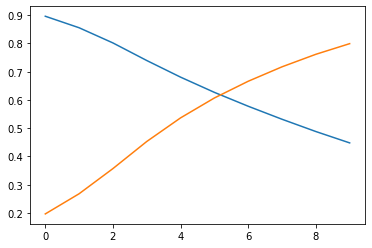

In [16]:
plt.plot(traces)
plt.plot(fidelities)

### W


In [ ]:
num_qubits = 3
num_layers = 2
thetas = np.ones(num_qubits*num_layers*5)
theta = np.pi / 2
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
loss_values = []
thetass = []
thetass, loss_values = qtm.base.fit(
    qc, num_steps=100, thetas=thetas,
    create_circuit_func=qtm.ansatz.create_Wchecker_linear,
    
    loss_func=qtm.loss.loss_fubini_study,
    optimizer=qtm.optimizer.sgd,
    verbose=1,
    num_layers=num_layers,
    is_return_all_thetas=True
)

np.savetxt("../../experiments/linear_ansatz_w/" + str(num_qubits) +
           "/loss_values_sgd.csv", loss_values, delimiter=",")
np.savetxt("../../experiments/linear_ansatz_w/" + str(num_qubits) +
           "/thetass_sgd.csv", thetass, delimiter=",")


Step: 100%|██████████| 100/100 [27:45<00:00, 16.66s/it]


In [ ]:
traces = []
fidelities = []
i = 0
for thetas in thetass:
    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.ansatz.create_linear_state(qc, thetas, num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.ansatz.create_w_state(num_qubits)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../../experiments/linear_ansatz_w/" +
           str(num_qubits) + "/traces_sgd.csv", traces, delimiter=",")
np.savetxt("../../experiments/linear_ansatz_w/" + str(num_qubits) +
           "/fidelities_sgd.csv", fidelities, delimiter=",")
